# Week One - Exploring and Cleaning Data

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sqlite3
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import matplotlib

from scipy.spatial import distance_matrix,distance


plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18,8)



## Why EDA?

By visalizing and exploring the data we can gain a better understanding of it, understand how to clean our data, how to engineer features and what models we might use. This process will help us to train a preditive model with a much better performance then a model which was just trained on the raw data, if it was even possible.

Let's see some toy examples which demonstrate that:

Text(0.5, 1.0, 'Quadratic relationship')

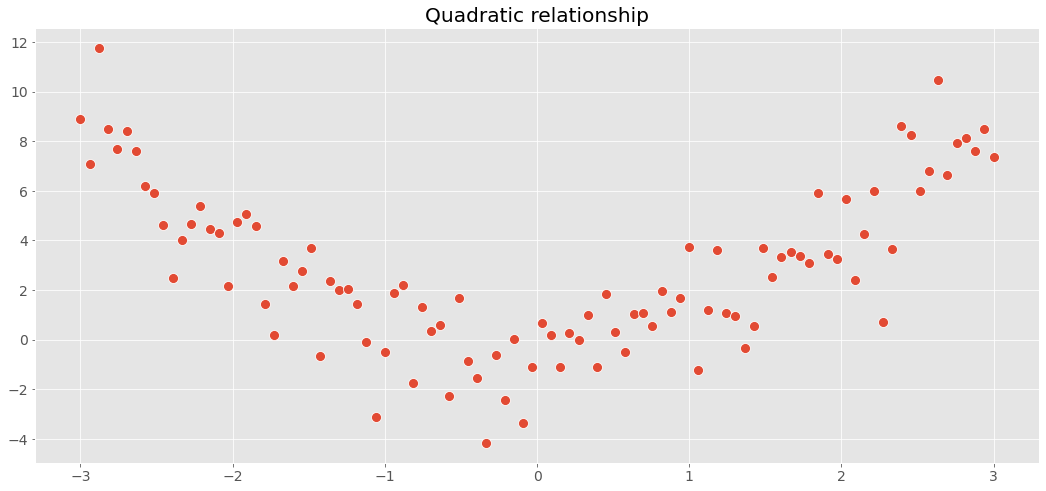

In [2]:
n = 100
x = np.linspace(-3, 3, n) 
y = x**2 + np.random.normal(0, 2, size=n)

sns.scatterplot(x, y, s=100).set_title("Quadratic relationship")


Basic visualization of y vs x shows that a simple linear regression model is a bad choice, and that we should perform polynomial regression with a quadratic term.

Another example is data with interaction effects:

<AxesSubplot:xlabel='x2', ylabel='y'>

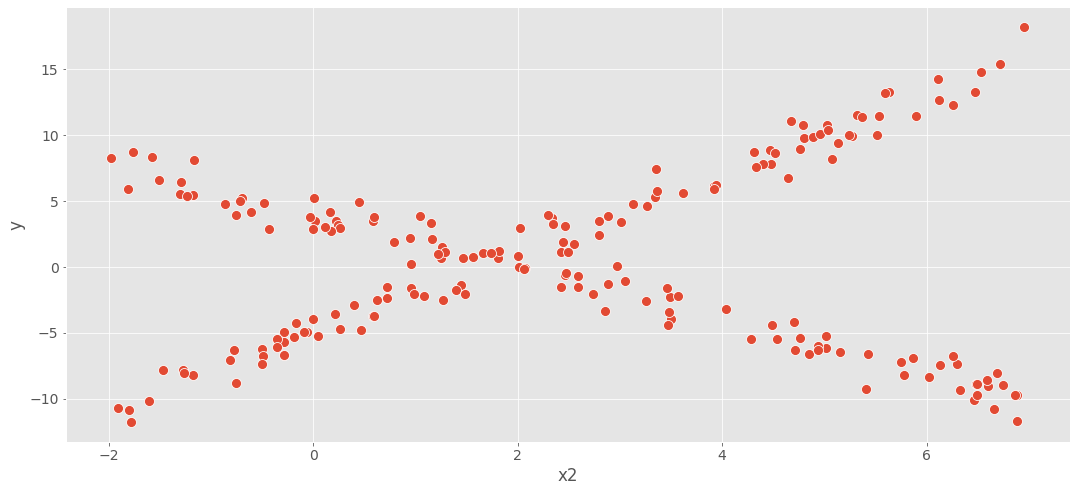

In [3]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 4 - 2*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})
s = 100
sns.scatterplot(data=df, x="x2", y="y", s=s)
#sns.scatterplot(data=df, y2, s=s)

<AxesSubplot:xlabel='x2', ylabel='y'>

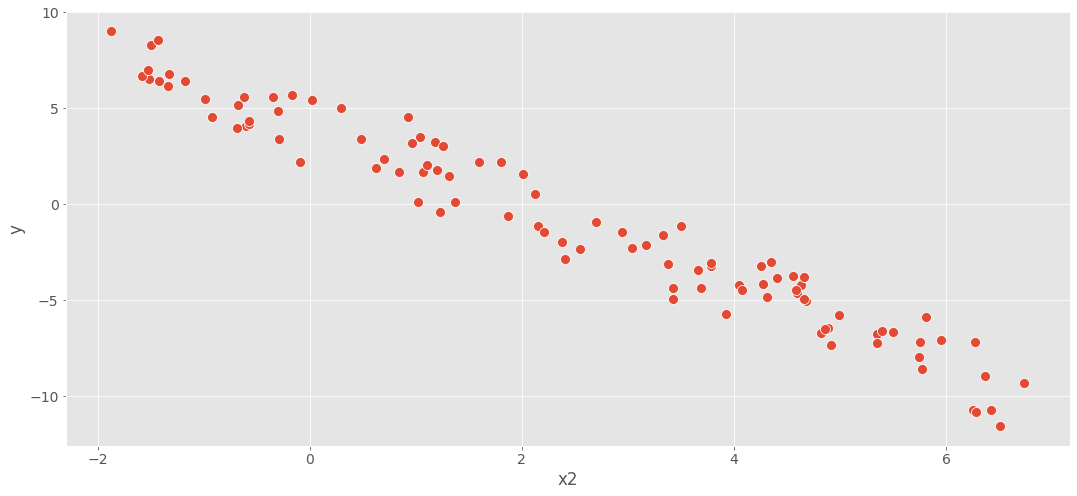

In [5]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 4 - 2*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})
s = 100
sns.scatterplot(data=df[df["x1"]!=0], x="x2", y="y", s=s)
#sns.scatterplot(data=df, y2, s=s)

<AxesSubplot:xlabel='x2', ylabel='y'>

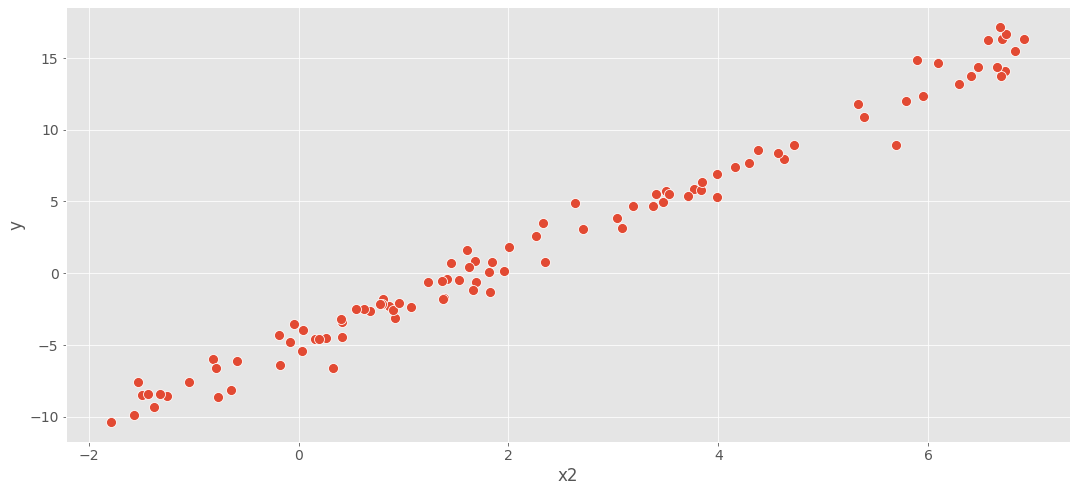

In [4]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 4 - 2*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})
s = 100
sns.scatterplot(data=df[df["x1"]==0], x="x2", y="y", s=s)
#sns.scatterplot(data=df, y2, s=s)

<AxesSubplot:xlabel='x2', ylabel='y'>

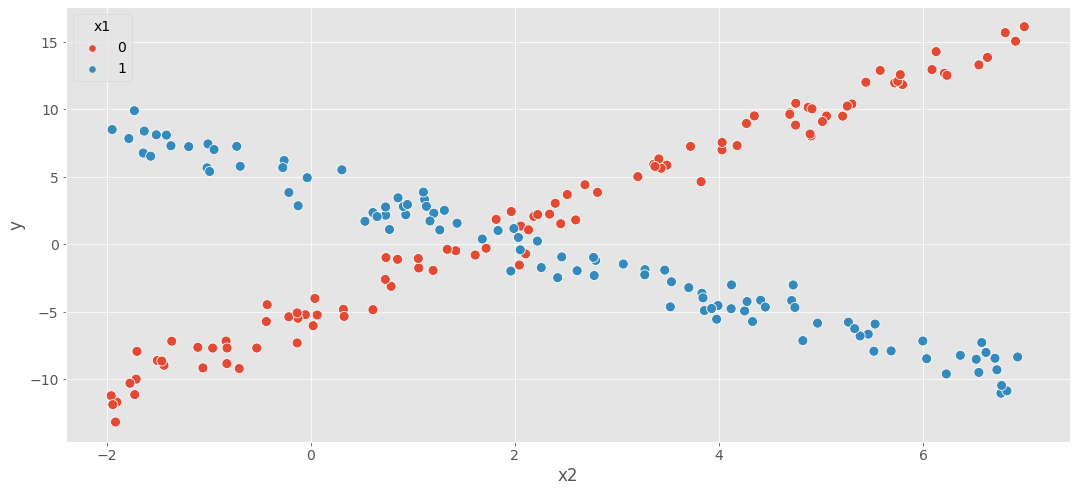

In [3]:
sigma = 1
n = 100
x = np.random.uniform(-2, 7, 2*n) 

x1 = np.array([0] * (n) + [1] * (n))

y1 = -5 + 3*x[:n] + np.random.normal(scale=sigma ,size=n)
y2 = 4 - 2*x[n:] + np.random.normal(scale=sigma, size=n)

x2 = x
df = pd.DataFrame({"x1": x1, "x2": x2, "y": np.concatenate((y1, y2))})
s = 100
sns.scatterplot(data=df, x="x2", y="y", s=s, hue="x1")
#sns.scatterplot(data=df, y2, s=s)

We can notice that there is an interaction between the x1 and x2 variables - depending on the value of x1, the coefficient of x2 needs to be different(if the lines corresponding to the blue and red dots would have the same slope, but would only be shifted - we would say that there is no interaction).
Performing linear regression on this data, as is, will give poor results, but introducing a new feature - x1 * x2, will give us a much better fit.

We can see from these simple examples that just a little visualization can help us understand how to improve our model.
 
Now, let's explore some real datasets.

In [54]:
data = pd.read_csv("titanic_train.csv")


In [47]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

A good thing to take a look at when starting out is our individual features' values and their distributions.
Diving into that, an important thing to look at is our null rates- data points containing null values can either be discarded or imputed.

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


---



We see that a very large amount of data points have no Age value nor a Cabin value. While it could be a bit troublesome to impute Cabin values, let's keep the age column in mind. Perhaps we can try and find a way to use some information from our dataset to perform some sort of imputation.
Let's move on for now and take a look at some other included features.

When preparing an EDA task, there are two possible approaches to make use of:
- Start out with several hypothesis about your features and try to assert how true they are.
- Approach the problem 'head on' with no prior assumptions.

We'll take the prior approach. Let's look at some basic hypothesis- "Women and children first", and look at the survival rates for the different values of sex.

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<img src= "https://imgflip.com/s/meme/Futurama-Fry.jpg">

Looking at our data this way can have its uses, but let's try another way.
Python has a suite of visualization libraries we can make use of. Let's take a step back and look at our raw survival rates:

Let's analyze the raw survival rates, visually:

Text(0.5, 1.0, 'Label counts')

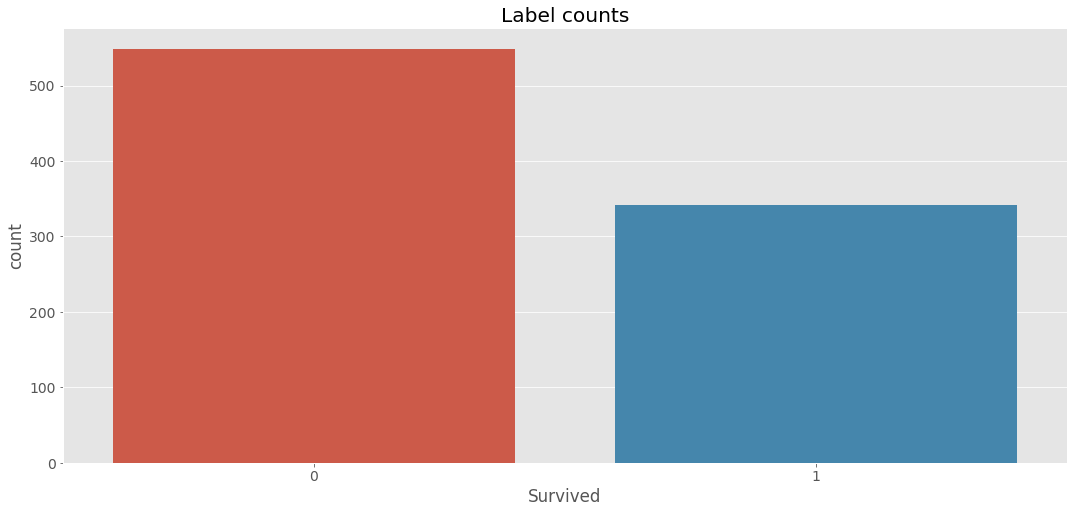

In [5]:
sns.countplot('Survived',data=data).set_title('Label counts')

Now, let's take another look at our survival rates per sex:

Text(0.5, 1.0, 'Survival by Sex')

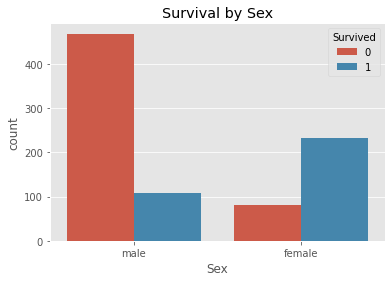

In [ ]:
sns.countplot('Sex',hue='Survived',data=data).set_title('Survival by Sex')

And we can now see that while less females are onboard overall, their rate of survival is definately higher.
Now, let's see the survival rates for the Pclass(passenger class) feature: 

Text(0.5, 1.0, 'Survival by Passenger Class')

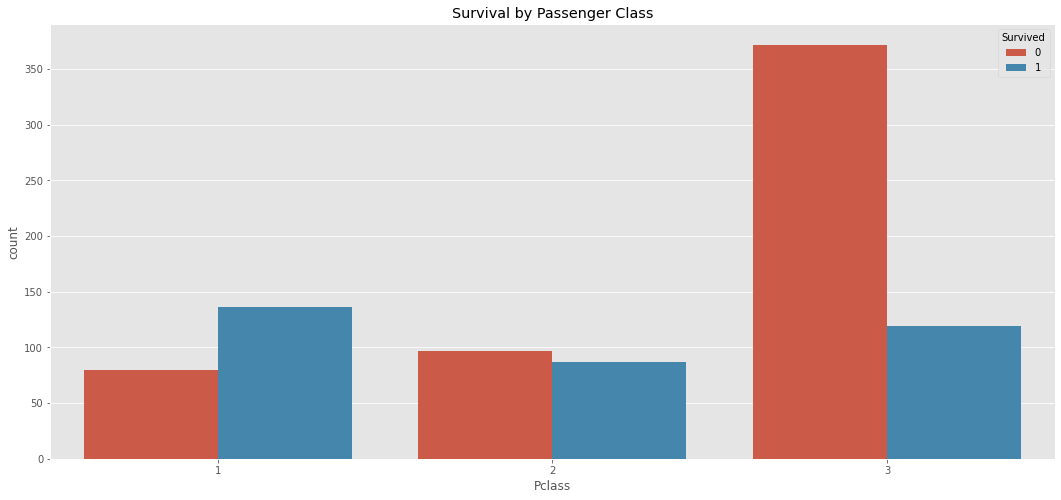

In [ ]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('Pclass',hue='Survived',data=data)
ax.set_title('Survival by Passenger Class')

Now, let's analyze the age feature, which is a (somewhat) continuous variable. First, an histogram:

Text(0.5, 1.0, 'Age histogram with a smooth curve')

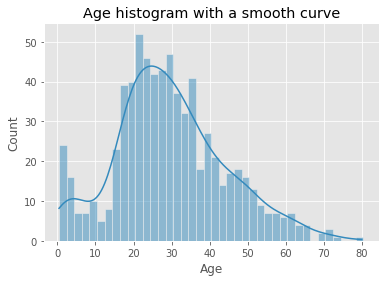

In [ ]:
sns.histplot(data=data,x='Age', binwidth=2, kde=True).set_title("Age histogram with a smooth curve")


We can notice some outliers on the right tail.

We would also like to know how the age distribution depends on survival:

Text(0.5, 1.0, 'Age distribution and normalized histogram conditional on survival')

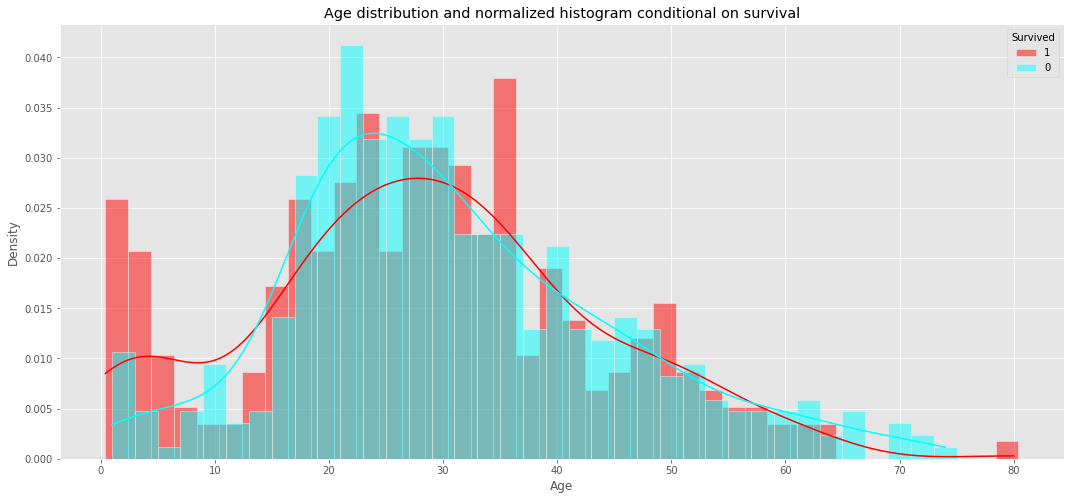

In [ ]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.histplot(data=data[data["Survived"]==1], x="Age", color="red", label="1", stat="density", binwidth=2, kde=True)
sns.histplot(data=data[data["Survived"]==0], x="Age", color="cyan", label="0", stat="density",binwidth=2, kde=True)
plt.legend(title="Survived")
ax.set_title("Age distribution and normalized histogram conditional on survival")

Notice the left tail, which contains useful information for prediction - lower ages have a higer survival rate.

Now, let's visualize it with a violin plot, with other variables:

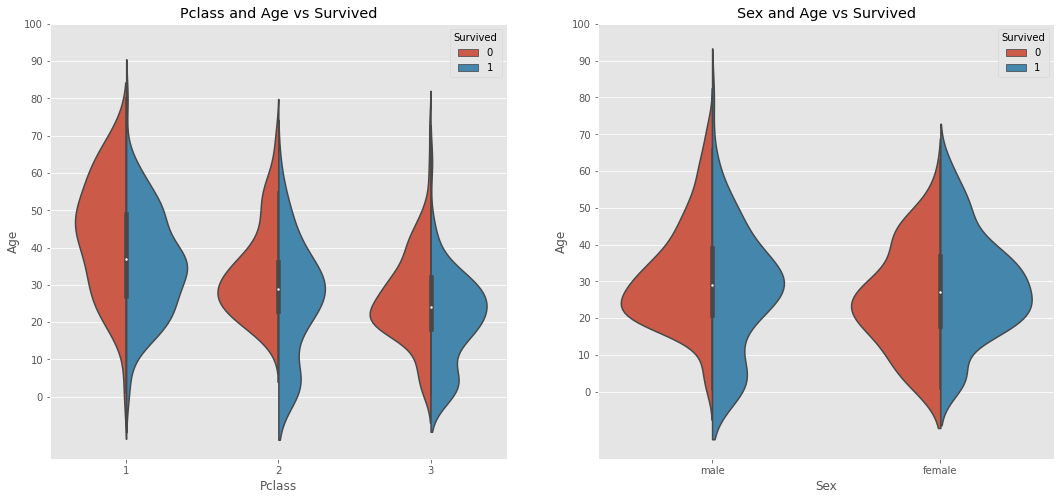

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


### Boxplot
<img src= "https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png" width ="600">

We can create similar visualizations as above, but with boxplots:

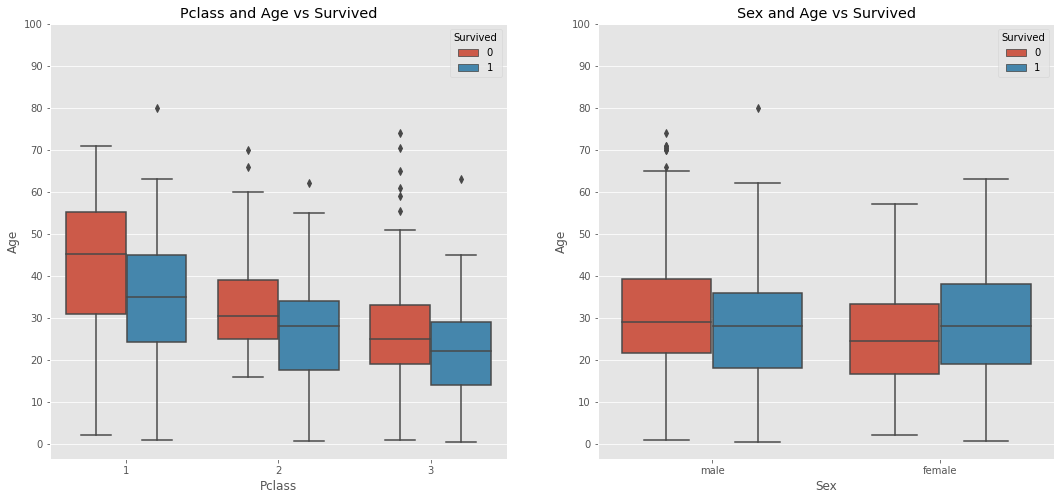

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot("Pclass","Age", hue="Survived", data=data,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot("Sex","Age", hue="Survived", data=data,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


With boxplots, we lose some information about the shape of the distribution.
Another useful visualization trick for exploring feature relations is a scatter matrix.
The scatter matrix plots a scatter plot between each pair of features, and some density plot for each feature by itself(to display distribution).
Let's plot one right now, ignoring the PassengerId column. Notice that non-numerical columns are not plotted.

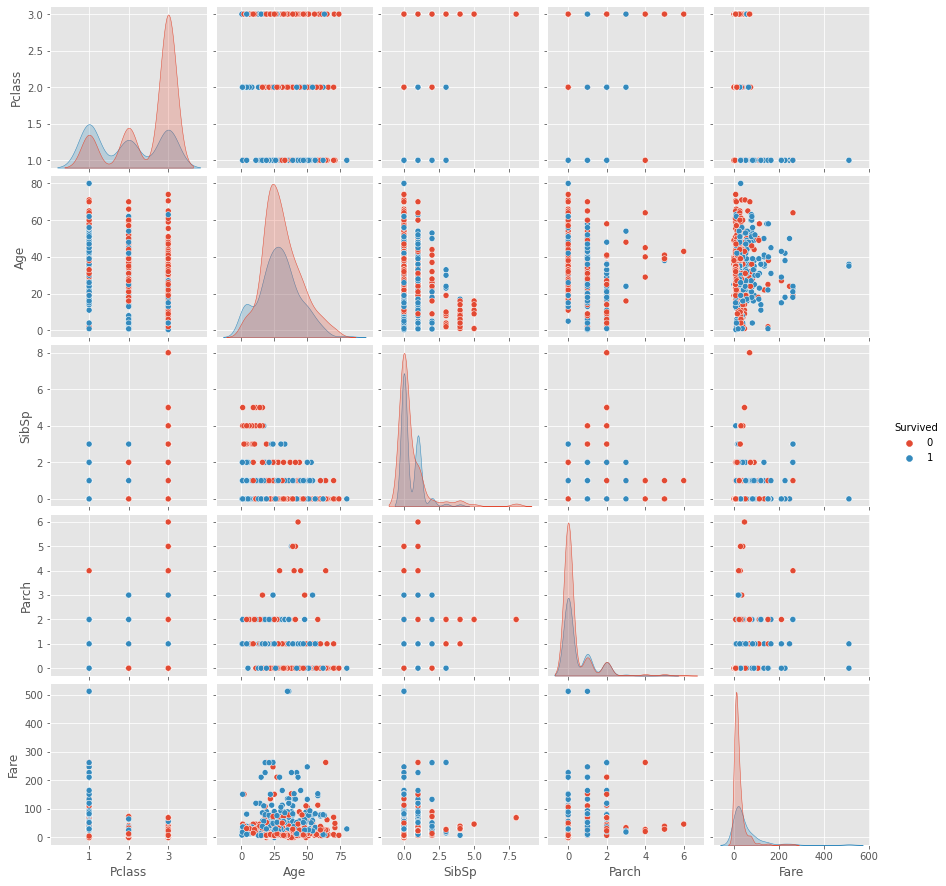

In [ ]:
sns.pairplot(data=data.drop(columns=['PassengerId']), hue="Survived", diag_kind='kde')

We can also plot a number of categorical features in a matrix:

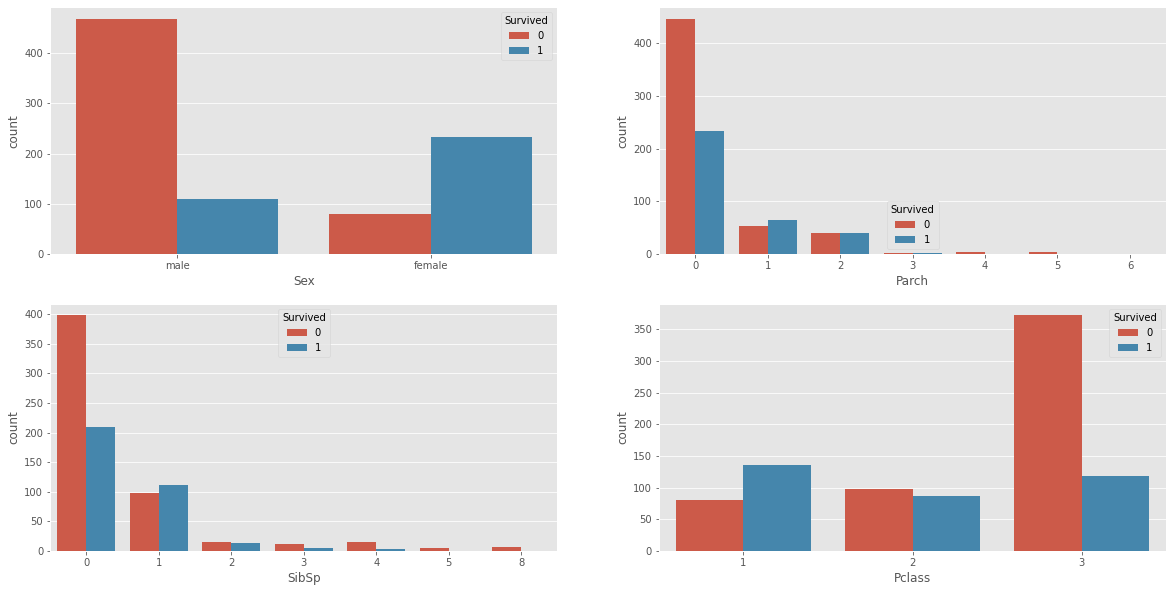

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
cat_cols = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked']
for i, ax in enumerate(axes.flatten()):
    sns.countplot(cat_cols[i],hue='Survived',data=data,ax=ax)



We can notice that higher SibSp(siblings and spouses) and Parch(parents and childrens) - features which correspond to the family of a passenger, are associated with higher survival rates.

Let's take a minute and talk about what we've been doing- trying to understand the role our existing features have in predicting the survival of a passenger.
When attempting a modeling task, it is useful to look at your features and their correlation to both your required predicted value (or label) if ordinal/continuous and to each other- eliminating highly correlated features can prove to be a powerful tool to reduce model complexity and avoid feature colinearity.
Let's explore our features' correlation using a heatmap:

<AxesSubplot:>

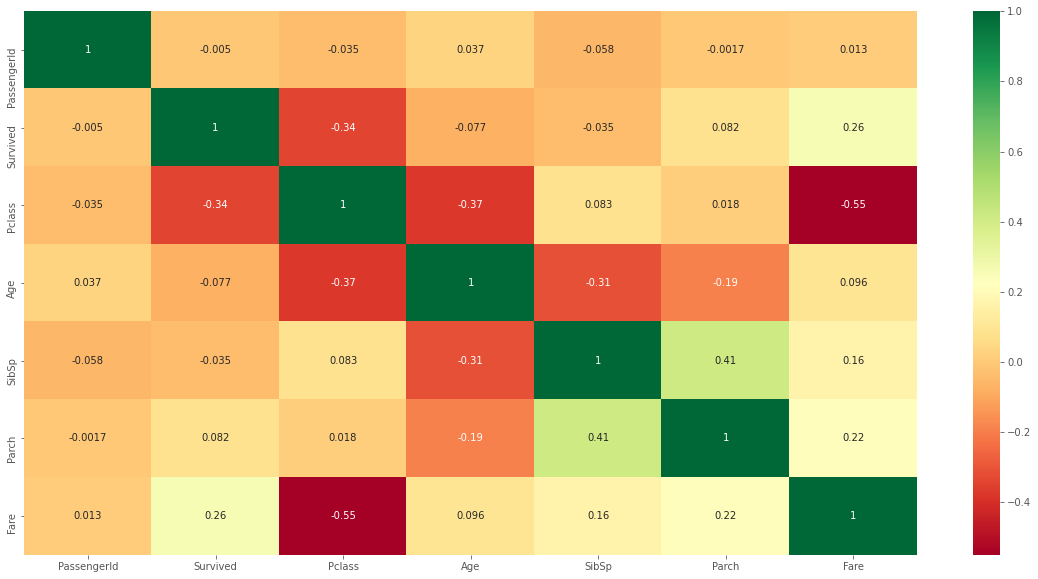

In [ ]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',ax=ax)


Things to note:
- Make sure you understand the results for PassengerId- it's got practically zero correlation to each of the other features. In some tasks, we can make use of a specific user's Id. In this case, we can probably feel okay about dropping it.
- Note the negative correlation between Age, Fare and Pclass.
- Note that, while not occuring here, it's important to take a moment and think about the features you're using when modeling. Some features can't always be calculated on the fly, and features which are highly correlated to your target value may be evident of some data leakage which would result in poor performance on validation. We'll talk about it in a later part of the course, but keep this in mind.
- We're using a very specific definition of correlation (Pearson), which might not fit discrete values- especially those without inherent ordering.

## Interlude - The importance of clean data

Up until now, we've looked at our dataset in an attempt to understand how each feature behaves. 
<br> Note that we've made a <b>VERY</b> serious assumption here- that our data acutally makes sense. Most of the time, we're going to encounter data that isn't all that tidy and readily usable. 
<br> Let's go over a few examples.

In [1]:
con = sqlite3.connect("example_db.db")
cursor = con.cursor()
ddf =pd.read_sql("SELECT * from corrupt_titanic",con)


NameError: name 'sqlite3' is not defined

As a start, lets take a look at a very similar table as one we looked at:

In [94]:
ddf[ddf.Age.str.contains("[a-zA-z]",regex=True).fillna(False)]

PassengerId  Survived  Pclass                         Name   Sex  Age  \
436          439         0       1  Futrelle, Mr. Jacques Heath  male  37A   

     SibSp  Parch  Ticket  Fare Cabin Embarked  IsPassenger DayBoughtTicket  \
436      1      0  113803  53.1  C123        S            1        saturday   

     DateBought  
436  2020/07/13

See anything that's missing?


If you thought "Where's the age column?", you got it.
<br> Looking at the description table can sometimes give you a valuable clue about possible problems. In this case, the age column is missing- which could suggest that some values conflict with it being a numeric column.
<br> This is a common enough problem, and we're gonna utilize Pandas' data structures to find our problematic rows.
Pandas dataframes are built on top of the Series object, which in turn is built on top of Numpy arrays.
<br>Now, we'll access the string values of the Age column, and filter using a regex to try and find letters:

Moving on- Now that we've found our culprit, we can fix this problem. In this case, it could make sense to replace this value with 37- but it might not be this straightforward in other cases.
Other examples of bad data can and might appear in our dataset, and be relatively easy to find with some basic explorative work:

For example, we might find some values that don't really make any sense, like negative ages:

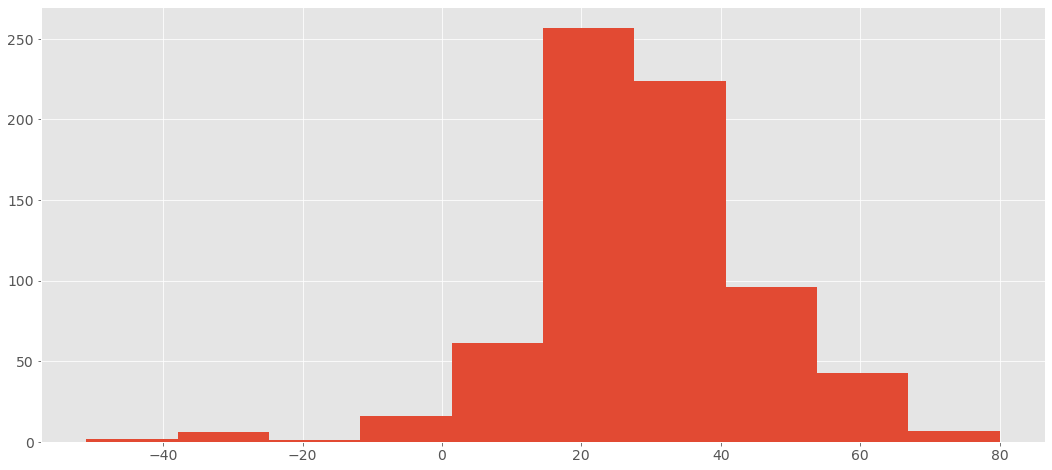

In [88]:
plt.hist(ddf[ddf['Age']!='37A'].Age.astype(np.float))
plt.show()

Or, looking back to at our 'describe' function, we can see that the IsPassenger is actually a constant. Needless to say this probably won't have any real predictive power, so we can safely ignore it.

Another feature type of note are ID features, that should have almost zero correlation with anything but but time passed (if events are taken into account) and things relevant to it, like:
- new categorical types
- changes in temperature (new samples from different times of year)
- better/ different image quality (started to get images from a new sensor)

Sometimes we get second order ids, which we could possibly want to keep (source table/file for example).


#### As a short exercise, try to tell me why this occures:

<AxesSubplot:>

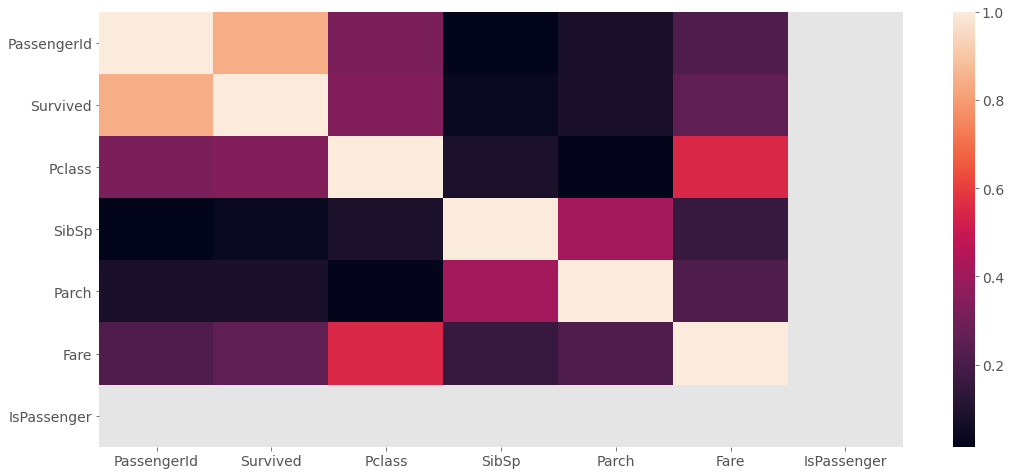

In [95]:
sns.heatmap(ddf.corr().abs())

This is an example of <b>Leakage</b>.

#### Handling missing values

Consider this:

In [96]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Why does age have missing values? Why does cabin?

What can we do about missing values?
- Keep them (some models can handle missing values, but we're not gonna go into that)
- Imputation
- Drop 'em

When should we drop missing values? 
<br>It depends on the amount of rows with missing values, how many features are missing and what are they.
<br>If we have categorical data with a LOT of categories, we can either miss part of the information in our data.
<br>In this case, we can (sometimes) coalesce some categories to one- more on this later.


#### Entry issues- how do YOU spell Wednesday?

Much like numeric entry problems, we can often find that some texutal and categorical data can have some inconsistencies when written. This can cause issues- for example, creating many more categories for some variables. In this case, let's look at the DayBoughtTicket column:

In [99]:
ddf.DayBoughtTicket.unique()

array(['saturday', 'sunday', 'tuesday', 'monday', 'wendsday', 'wednsday',
       'thurday', 'saterday'], dtype=object)

Luckily for us, we can (and should) find these problems rather easily, as well as fix them.
In order to do so, we'll use the fuzzywuzzy (yes) library. As its name might indicate, the library allows for fuzzy string search and matching:

In [102]:
import fuzzywuzzy
from fuzzywuzzy import process

In [104]:
days = ddf['DayBoughtTicket'].unique()
matches = fuzzywuzzy.process.extract("wednesday", days, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [105]:
matches

[('wednsday', 94), ('wendsday', 82), ('tuesday', 62), ('sunday', 53)]

In this case, we can find the "closest" values to a given term, which we can then replace.

Last but not least- dates.
<br> Dates can appear in many shapes or forms, and can be difficult to format correctly. You might even find yourself dealing with several calenders. As an example:

In [110]:
ddf.DateBought.sample(10)

657    2020-08-25
530    2020-07-10
781    2020-28-07
178    2020-07-23
698    2020-17-07
637    2020-07-24
480    2020-07-19
670    2020/07/08
745    2020-07-09
564    2020/07/15
Name: DateBought, dtype: object

When looking at dates, it's important to note that we don't alway know just how to format them correctly- noting that the days and months are sort of jumbled together. A good rule of thumb is formatting what we do know, and using that knowledge to format the other strings.

In [117]:
def attempt_format(x):
    year,month,day = x.split("-") 
    if int(month)>12:
        return "-".join([year,day,month])
    return

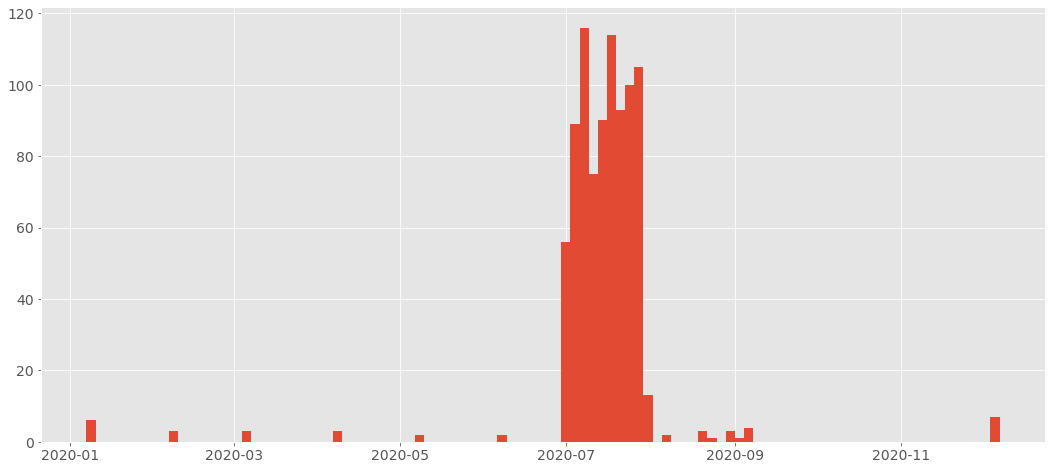

In [122]:
plt.hist(pd.to_datetime(ddf.DateBought.str.replace("/",'-').apply(attempt_format)),
        bins=100)
plt.show()

#### The power of Python

As you probably know, a general rule of thumb for Python is- if anyone needed to do this more than a couple of times, there's probably a library for it. Data analysis, exploration and machine learning is, of course, no exception.
For the remainder of our talk about exploration, let's look at the pandas profiling library:

In [9]:
from pandas_profiling import ProfileReport

In [10]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploring null values

We will use the missingno package to visualize missing data.


In [7]:
import missingno as msno

<AxesSubplot:>

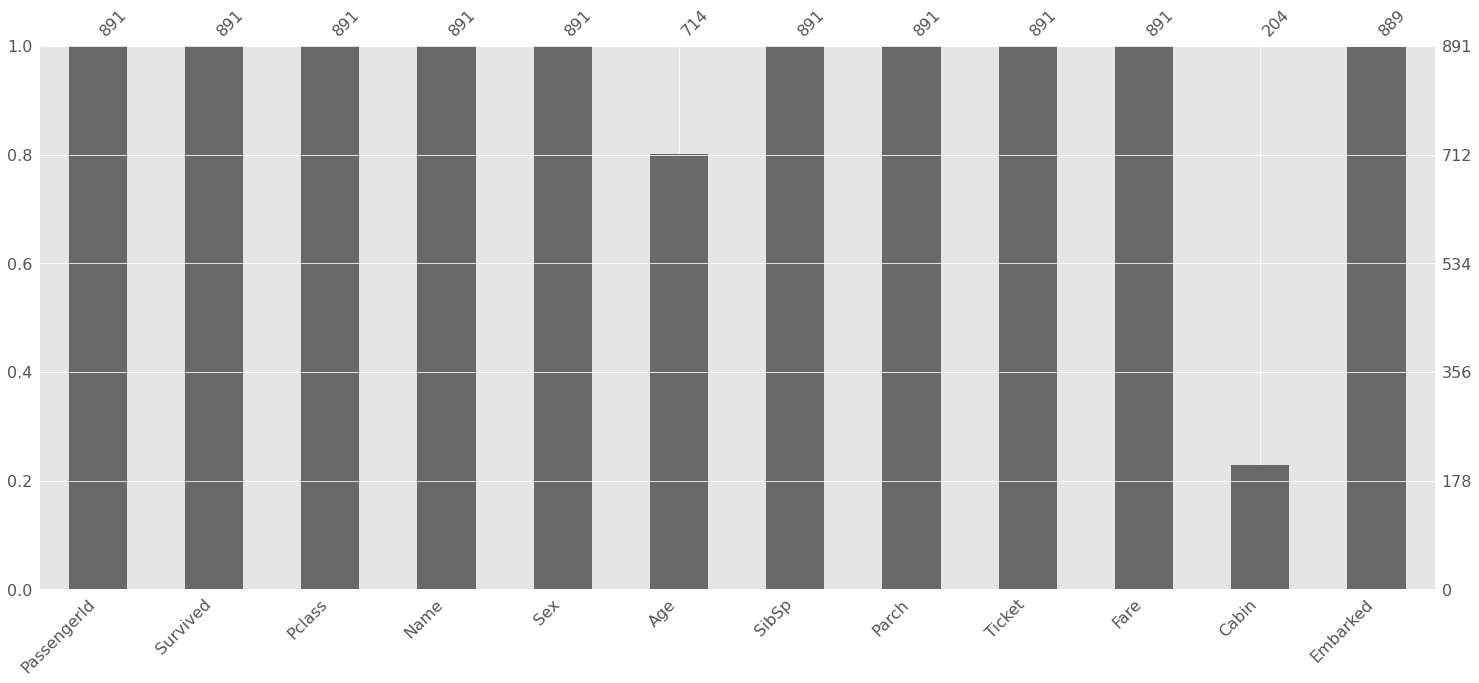

In [8]:
msno.bar(data)

<AxesSubplot:>

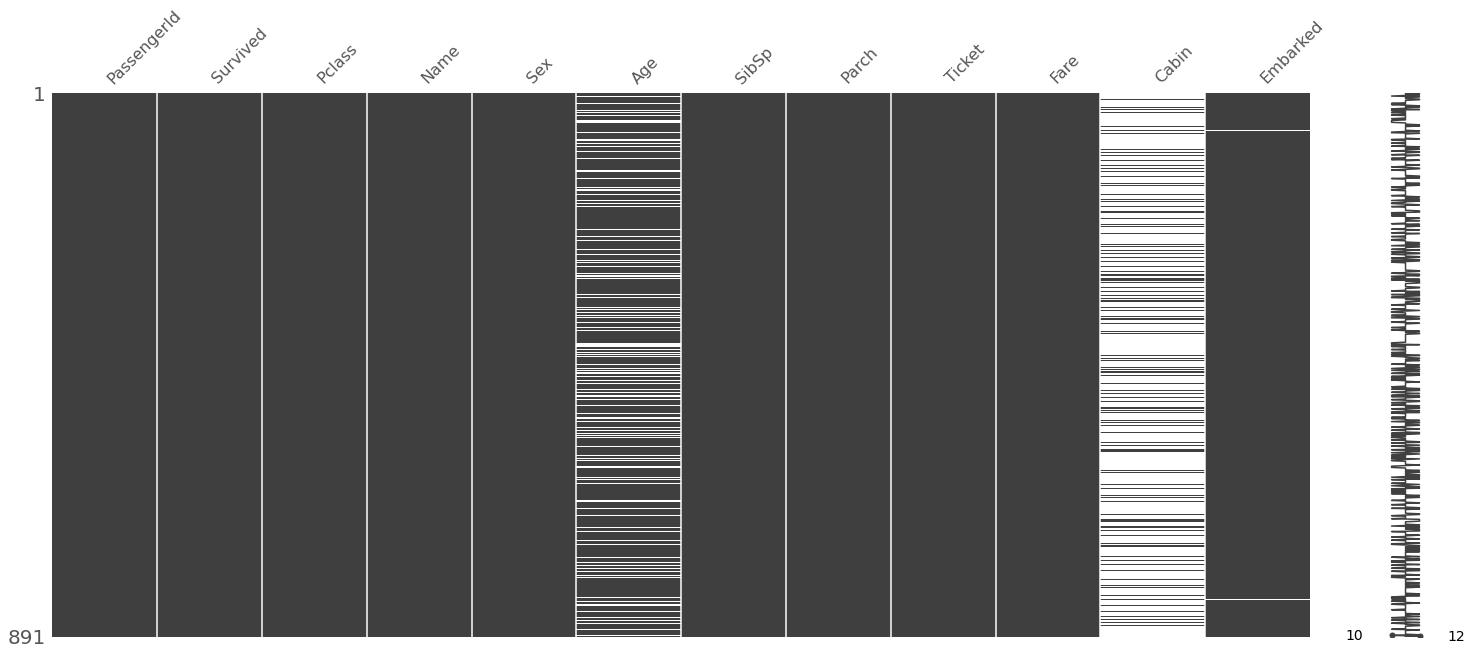

In [9]:
msno.matrix(data)

<AxesSubplot:>

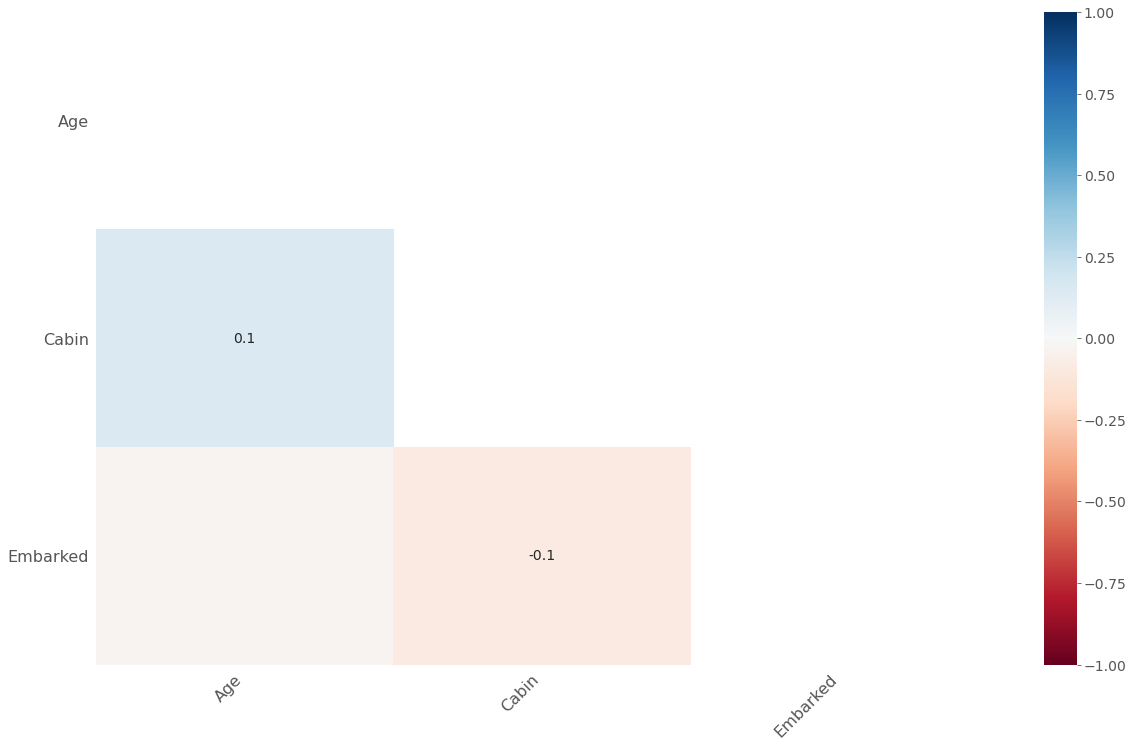

In [10]:
msno.heatmap(data)

This heatmap shows us correlation between the features in terms of null values, we can see that there is no correlation in this case.

# Spatial Data

In [6]:
base_df = pd.read_csv("station_df.csv")
events = pd.read_csv("event_df.csv")[["car","station","event_time"]]

In [6]:
base_df.head()

station_id  capacity  longitude   latitude                      address  \
0           1         4  34.800400  32.058597  משה דיין 73-75, תל אביב יפו   
1           3         6  34.759492  32.047511                       עזה 32   
2           4         7  34.841800  32.113800            דבורה הנביאה 124    
3           5         6  34.789200  32.104900     יעקב אפטר 3, תל אביב יפו   
4           6         5  34.784400  32.061700                 יד חרוצים 17   

   official_station  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [ ]:
len(base_df.index)

234

In [ ]:
events.tail()

car   station       event_time
608184   14  79819643  09/05/2019 9:45
608185  184  97784338  09/05/2019 9:45
608186  224       126  09/05/2019 9:45
608187   73  76003642  09/05/2019 9:45
608188  235  40683559  09/05/2019 9:45

In [7]:
import folium

from folium.plugins import HeatMap, MarkerCluster

import geopandas as gpd
import pyproj
import shapely 
from sklearn.cluster import KMeans

In [8]:
wgs84p=pyproj.Proj("+init=EPSG:4326")
UTM36N=pyproj.Proj("+init=EPSG:32636")

df = gpd.GeoDataFrame(base_df)
df['geometry'] = df.apply(lambda row: shapely.geometry.point.Point(row['latitude'],row['longitude']),axis=1)
df.crs ={'init':'epsg:4236','no_defs':True}
df = df.to_crs(epsg='32636')
df['x'] = df.geometry.x
df['y'] = df.geometry.y

In [9]:
df.head()

station_id  capacity  longitude   latitude                      address  \
0           1         4  34.800400  32.058597  משה דיין 73-75, תל אביב יפו   
1           3         6  34.759492  32.047511                       עזה 32   
2           4         7  34.841800  32.113800            דבורה הנביאה 124    
3           5         6  34.789200  32.104900     יעקב אפטר 3, תל אביב יפו   
4           6         5  34.784400  32.061700                 יד חרוצים 17   

   official_station                        geometry              x  \
0                 1  POINT (413760.923 3851535.647)  413760.922624   
1                 1  POINT (412703.640 3847008.092)  412703.640366   
2                 1  POINT (418851.954 3856081.361)  418851.954058   
3                 1  POINT (417986.069 3850254.702)  417986.068639   
4                 1  POINT (414028.229 3849758.421)  414028.229294   

              y  
0  3.851536e+06  
1  3.847008e+06  
2  3.856081e+06  
3  3.850255e+06  
4  3.849758e+06

In [10]:
means=(df[['latitude', 'longitude']].drop_duplicates().mean())
means = (means[0],means[1])


We can visualize on the stations on a map with the folium package:

In [11]:
import folium

In [12]:
ta_coords = [32.109333, 34.855499]
m_1 = folium.Map(location=ta_coords, tiles='openstreetmap')

for coords in list(zip(df['latitude'], df['longitude'])):
    folium.Circle(coords, radius=20, fill=True, color="blue").add_to(m_1)

folium.Circle(means, radius=50, fill=True, color="red").add_to(m_1)
m_1


For our example, we're gonna create two types of features. First, we'll calculate the amount of stations within 250 and 500 meters from each station- using the distance_matrix function from scipy.

We can visualize the capacity of each station by varying the size of each point:

In [13]:
ta_coords = [32.109333, 34.855499]
m_2 = folium.Map(location=ta_coords, tiles='openstreetmap')


for i, coords in enumerate(list(zip(df['latitude'], df['longitude']))):

    folium.CircleMarker(coords, radius=int(2*df.iloc[i]["capacity"]) , fill=True, color='red', fill_color='red').add_to(m_2)

m_2

We can also visualzie the station's density with a heapmap:

In [14]:

folium.plugins.HeatMap(list(zip(df['latitude'], df['longitude']))).add_to(m_1)
m_1

### A sneak preview of feature engineering 

Remember when we talked about null values? Let's circle back to that.
As you remember, 177 rows had null Age values. We've seen this could be a useful feature- I, for one, would hate to lose it.
When encountering null row, we usually have two options:
- Drop the rows altogether, which hopefully won't hurt when that's not a large portion of your data
- Setting some specific values to replace nulls - which is a process called "Imputation"

Let's try and use what we've seen during our analysis to perform a proper imputation.
We've seen that our name column includes, among other things, a title- Mr, Mrs and so on. Let's epxlore the hypothesis where this allows us to get a good imputed value for the Age column.

First, let's create the relevant column:

In [55]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

In [56]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Capt          1
Countess      1
Lady          1
Sir           1
Ms            1
Jonkheer      1
Don           1
Name: Title, dtype: int64

Note that while a few titles are quite frequent, several titles are only encountered a handful of times- it's doubtful that we get anything of importance from them. 
To make up for this, let's define a function to consolidate them into the same title ("Other"), and apply it to our dataset.

In [57]:
def replace_uncommon_titles(x):
    if x in ["Master","Miss","Mr","Mrs"]:
        return x
    return "Other"
data["Title"] = data["Title"].apply(lambda x:replace_uncommon_titles(x))

In [58]:
data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

Much better.

Now, let's see if we've gained anything from this:

In [59]:
data.agg({"Age":['count','mean','std','median']})

Age
count   714.000000
mean     29.699118
std      14.526497
median   28.000000

In [60]:
data.groupby("Title").agg({"Age":['count','mean','std','median']})

Age                             
       count       mean        std median
Title                                    
Master    36   4.574167   3.619872    3.5
Miss     146  21.773973  12.990292   21.0
Mr       398  32.368090  12.708793   30.0
Mrs      108  35.898148  11.433628   35.0
Other     26  42.384615  13.200233   44.5

Before we part, let's look at another use for visualization that we'll explore later in the course- Model evaluation.

We'll start by dropping some not-immediately-obvious column, and train an (extremely) simple model to classify survivors.

In [61]:
data=data.drop(columns=['PassengerId','Name',"Ticket","Cabin",])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [62]:
ohe = ColumnTransformer([('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['Sex','Embarked','Title'])],remainder="passthrough",)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data.dropna().drop(columns=['Survived']), data.dropna()['Survived'], test_size=0.25)

In [64]:
data=ohe.fit_transform(X_train)

In [65]:
X_train = pd.DataFrame(data=ohe.fit_transform(X_train),index=np.arange(X_train.shape[0]),columns=ohe.get_feature_names_out())
X_test = pd.DataFrame(ohe.transform(X_test),columns=ohe.get_feature_names_out())

In [66]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
from sklearn.metrics import classification_report
from scikitplot import plotters

In [67]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       101
           1       0.84      0.60      0.70        77

    accuracy                           0.78       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.78      0.77       178



In [ ]:
X_test['proba'] = clf.predict_proba(X_test)[:,1]
X_test['label'] = y_test

In [75]:
X_test['proba']

0      0.347826
1      0.128342
2      0.928571
3      0.128342
4      0.928571
         ...   
173    0.128342
174    0.128342
175    0.347826
176    0.347826
177    0.068966
Name: proba, Length: 178, dtype: float64

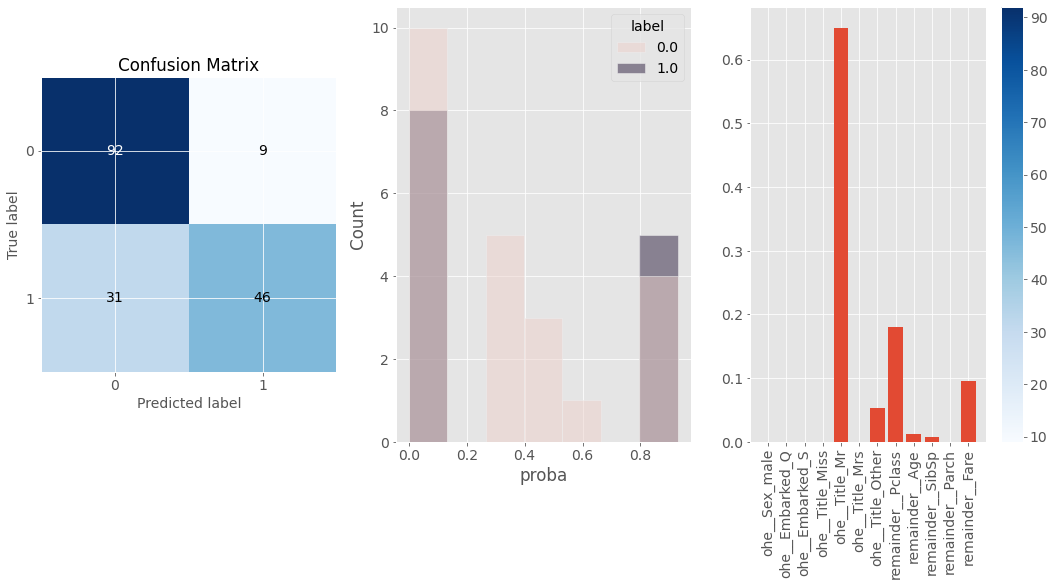

In [77]:
fig,axes = plt.subplots(1,3)

plotters.plot_confusion_matrix(y_test,X_test['proba']>.5,ax=axes.flatten()[0])
sns.histplot(X_test,x='proba',hue='label',ax=axes.flatten()[1])
plt.bar(X_train.columns,clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()